In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
%matplotlib inline

data = pd.read_csv('/Users/Suki/Desktop/Zeiss/HR_comma_sep.csv')

In [13]:
data.head()

,Customer_Satisfaction_Level,Sales_Level,Purchase_Number,Average_Expense_Similar,Contact_Time,Refund,Discount,Application,Review,Churn
0,0.38,0.53,2,1570,2.0,0,0,Education,low,1
1,0.80,0.86,5,2620,4.0,0,0,Education,medium,1
2,0.11,0.88,7,2720,2.5,0,0,Education,medium,1
3,0.72,0.87,5,2230,3.0,0,0,Education,low,1
4,0.37,0.52,2,1590,2.0,0,0,Education,low,1


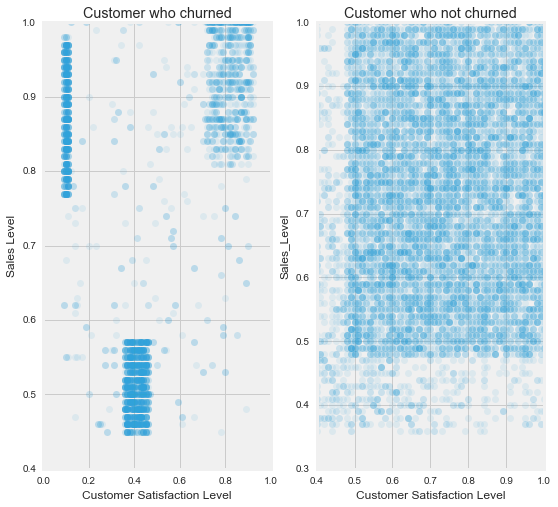

In [18]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(data.Customer_Satisfaction_Level[data.Churn == 1],data.Sales_Level[data.Churn == 1],'o', alpha = 0.1)
plt.ylabel('Sales Level')
plt.title('Customer who churned')
plt.xlabel('Customer Satisfaction Level')

plt.subplot(1,2,2)
plt.title('Customer who not churned')
plt.plot(data.Customer_Satisfaction_Level[data.Churn == 0],data.Sales_Level[data.Churn == 0],'o', alpha = 0.1)
plt.xlim([0.4,1])
plt.ylabel('Sales_Level')
plt.xlabel('Customer Satisfaction Level')

In [19]:
from sklearn.cluster import KMeans
kmeans_df =  data[data.Churn == 1].drop([ u'Purchase_Number',
       u'Average_Expense_Similar', u'Contact_Time', u'Refund',
       u'Churn', u'Discount', u'Application', u'Review'],axis = 1)
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(kmeans_df)
kmeans.cluster_centers_

array([[ 0.80851586,  0.91170931],
       [ 0.11115466,  0.86930085],
       [ 0.41014545,  0.51698182]])

# But for those who left - there are very clear 3 clusters:
The happy and appreciated. why would they leave? I called them, somewhat jokingly, "Winners" - those who leave because they were offered a better opportunity.

The appreciated but unhappy - Maybe they are over qualified for the job. I called them the "Frustrated"

The unappreciated and unhappy - It is not surprising that these would leave, possibly even fired. they are simply a "Bad Match"

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


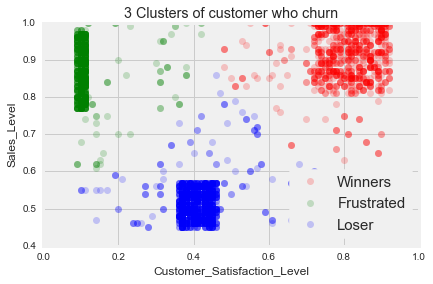

In [33]:
left = data[data.Churn == 1]
left['label'] = kmeans.labels_
plt.figure()
plt.xlabel('Customer_Satisfaction_Level')
plt.ylabel('Sales_Level')
plt.title('3 Clusters of customer who churn')
plt.plot(left.Customer_Satisfaction_Level[left.label==0],left.Sales_Level[left.label==0],'o', alpha = 0.2, color = 'r')
plt.plot(left.Customer_Satisfaction_Level[left.label==1],left.Sales_Level[left.label==1],'o', alpha = 0.2, color = 'g')
plt.plot(left.Customer_Satisfaction_Level[left.label==2],left.Sales_Level[left.label==2],'o', alpha = 0.2, color = 'b')
plt.legend(['Winners','Frustrated','Loser'], loc = 4, fontsize = 15,frameon=True)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


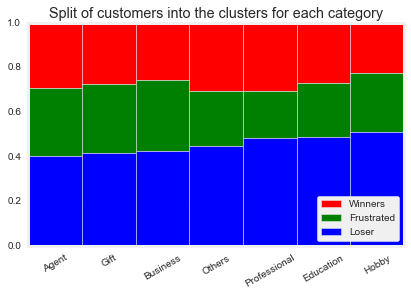

In [37]:
winners_hours_std = np.std(left.Average_Expense_Similar[left.label == 0])
frustrated_hours_std = np.std(left.Average_Expense_Similar[left.label == 1])
bad_match_hours_std = np.std(left.Average_Expense_Similar[left.label == 2])
winners = left[left.label ==0]
frustrated = left[left.label == 1]
loser = left[left.label == 2]

def get_pct(df1,df2, value_list,feature):
    pct = []
    for value in value_list:
        pct.append(np.true_divide(len(df1[df1[feature] == value]),len(df2[df2[feature] == value])))
    return pct
columns = ['Application','winners','loser','frustrated']
winners_list = get_pct(winners,left,np.unique(left.Application),'Application')
frustrated_list = get_pct(frustrated,left,np.unique(left.Application),'Application')
loser_list = get_pct(loser,left,np.unique(left.Application),'Application')
plot_df = pd.DataFrame(columns = columns)
plot_df['Application'] = np.unique(left.Application)
plot_df['winners'] = winners_list
plot_df['loser'] = loser_list
plot_df['frustrated'] =frustrated_list
plot_df = plot_df.sort(columns = 'loser')



plt.figure()
values = np.unique(left.Application)
plt.bar(range(len(values)),plot_df.winners,width = 1, color = 'r',bottom=plot_df.loser + plot_df.frustrated)
plt.bar(range(len(values)),plot_df.frustrated, width = 1, color = 'g',bottom=plot_df.loser)
plt.bar(range(len(values)),plot_df.loser, width = 1, color = 'b')
plt.xticks(range(len(values))+ 0.5*np.ones(len(values)),plot_df.Application, rotation= 30)
plt.legend(['Winners','Frustrated','Loser'], loc = 4,frameon=True)

plt.title('Split of customers into the clusters for each category')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


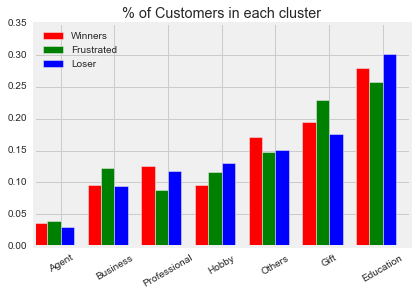

In [41]:
def get_num(df,value_list,feature):
    out = []
    for val in value_list:
        out.append(np.true_divide(len(df[df[feature] == val]),len(df)))
    return out

winners_list = get_num(winners,np.unique(left.Application),'Application')
frustrated_list = get_num(frustrated,np.unique(left.Application),'Application')
loser_list = get_num(loser,np.unique(left.Application),'Application')
plot_df = pd.DataFrame(columns = columns)
plot_df['Application'] = np.unique(left.Application)
plot_df['winners'] = winners_list
plot_df['loser'] = loser_list
plot_df['frustrated'] = frustrated_list
plot_df = plot_df.sort(columns = 'loser')

plt.figure()
values = np.unique(left.Application)
plt.bar(range(len(values)),plot_df.winners,width = 0.25, color = 'r')
plt.bar(range(len(values))+0.25*np.ones(len(values)),plot_df.frustrated, width = 0.25, color = 'g')
plt.bar(range(len(values))+0.5*np.ones(len(values)),plot_df.loser, width = 0.25, color = 'b')
plt.xticks(range(len(values))+ 0.5*np.ones(len(values)),plot_df.Application, rotation= 30)
plt.legend(['Winners','Frustrated','Loser'], loc = 2)

plt.title('% of customers in each cluster')

([<matplotlib.axis.XTick at 0x11cf0d1d0>,
 <a list of 3 Text xticklabel objects>)

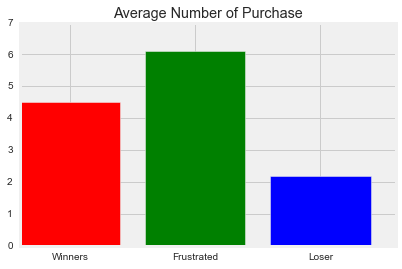

In [42]:
plt.figure()
plt.bar(0,np.mean(winners.Purchase_Number), color = 'r')
plt.bar(1,np.mean(frustrated.Purchase_Number), color = 'g')
plt.bar(2,np.mean(loser.Purchase_Number), color = 'b')
plt.title('Average Number of Purchase')
plt.xticks([0.4,1.4,2.4],['Winners','Frustrated','Loser'])